In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [33]:
x = np.array([0.2, 1.2, 1, 1.4, -1.5, 0.5, -0.5])
y = np.array([5.6, 8.6, 8, 9.2, 0.5, 6.5, 3.5])
eta = 0.2
initial_w, initial_b = 0.3, 0.1

In [34]:
class Model(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # In practice these should be randomly initialized
        self.w = tf.Variable(initial_w)
        self.b = tf.Variable(initial_b)
        
    def __call__(self, x):
        return self.w * x + self.b

In [35]:
model = Model()

### Loss Function

In [36]:
def loss(predicted_y, actual_y):
    return tf.reduce_mean(tf.square(predicted_y - actual_y))

In [37]:
x = tf.convert_to_tensor(x, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.float32)

In [38]:
model.w.numpy(), model.b.numpy()

(np.float32(0.3), np.float32(0.1))

In [39]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dw, db = t.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return current_loss

In [48]:
model = Model()
eta=0.1

list_w, list_b, losses = [], [], []
for epoch in range(100):
    list_w.append(model.w.numpy())
    list_b.append(model.b.numpy())
    current_loss = train(model, x, y, learning_rate=eta)
    losses.append(current_loss)
    print(f"Epoch {epoch}: w={model.w.numpy()}, b={model.b.numpy()}, loss={current_loss.numpy()}")

Epoch 0: w=1.1766571998596191, b=1.2574286460876465, loss=40.191871643066406
Epoch 1: w=1.7971644401550293, b=2.125762701034546, loss=21.90599250793457
Epoch 2: w=2.233139753341675, b=2.779653549194336, loss=12.019221305847168
Epoch 3: w=2.536583185195923, b=3.2741165161132812, loss=6.652888774871826
Epoch 4: w=2.7451975345611572, b=3.6497464179992676, loss=3.7248435020446777
Epoch 5: w=2.8862721920013428, b=3.9365413188934326, loss=2.115959882736206
Epoch 6: w=2.9795196056365967, b=4.156706809997559, loss=1.2237073183059692
Epoch 7: w=3.0391433238983154, b=4.326711177825928, loss=0.7229235768318176
Epoch 8: w=3.0753469467163086, b=4.458796501159668, loss=0.4375726878643036
Epoch 9: w=3.095433235168457, b=4.5620856285095215, loss=0.27193549275398254
Epoch 10: w=3.1046056747436523, b=4.643397331237793, loss=0.17366066575050354
Epoch 11: w=3.106550693511963, b=4.707843780517578, loss=0.11389163881540298
Epoch 12: w=3.103860855102539, b=4.759273052215576, loss=0.07655998319387436
Epoch 13

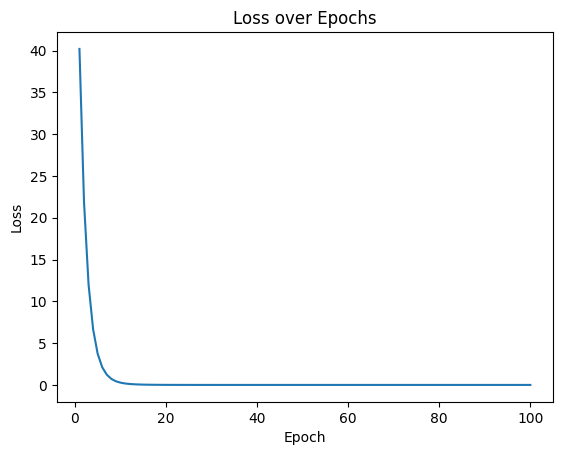

In [49]:
plt.plot(range(1, len(losses)+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

In [50]:
initializer_w = tf.keras.initializers.Constant(value=0.3)
initializer_b = tf.keras.initializers.Constant(value=0.1)
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1, kernel_initializer=initializer_w, bias_initializer=initializer_b)
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mean_squared_error')
history = model.fit(x, y, epochs=100, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 40.1919
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 21.9060
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.0192
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 6.6529
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 3.7248
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.1160
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.2237
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7229
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4376
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2719
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1737
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1139
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0766
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0526
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0368
Epoch 16/100
1/1 

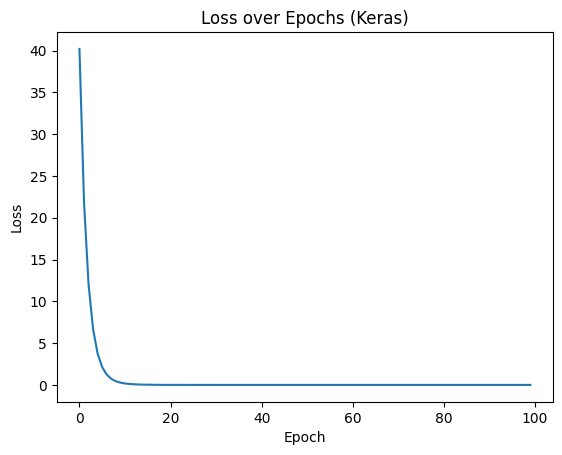

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs (Keras)')
plt.show()